In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy.io.wavfile as wavfile
from scipy.signal import spectrogram
from scipy.fftpack import fft

In [3]:
path = 'dsl_data/development.csv'
df = pd.read_csv(path)

In [4]:
# Dataframe exploration

print('***** DATAFRAME INFO *****\n')
print(df.info())
print('\n\n***** HEAD *****\n')
print(df.head())
print('\n\n ***** POSSIBLE CLASSIFICATION OUTCOMES *****\n')
print(df.groupby(['action', 'object']).size())

***** DATAFRAME INFO *****

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9854 entries, 0 to 9853
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Id                                     9854 non-null   int64 
 1   path                                   9854 non-null   object
 2   speakerId                              9854 non-null   object
 3   action                                 9854 non-null   object
 4   object                                 9854 non-null   object
 5   Self-reported fluency level            9854 non-null   object
 6   First Language spoken                  9854 non-null   object
 7   Current language used for work/school  9854 non-null   object
 8   gender                                 9854 non-null   object
 9   ageRange                               9854 non-null   object
dtypes: int64(1), object(9)
memory usage: 770.0+ KB
None


**

In [94]:
# definition of functions to represent each audio 

def plot_spectrogram(filepath):
    sr, audio = wavfile.read(filepath) #returns sample rate and audio data
    frequencies, times, spec = spectrogram(audio, fs=sr)
    plt.pcolormesh(times, frequencies, 10*np.log10(spec)) #changed the scale to dB
    plt.colorbar()
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()
    return spectrogram


def plot_time_dimension(filepath):
    sr, audio = wavfile.read(filepath)
    audioArray = np.array(audio)
    plt.plot(audioArray)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()
    
def plot_freq_dimension(filepath):
    sr, audio = wavfile.read(filepath)
    audioArray = np.array(audio)
    freqArray = np.abs(fft(audioArray))
    decibels = 20 * np.log10(freqArray)
    plt.plot(decibels)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.show()
    
    
def get_sample_rate(filepath):
    sr, audio = wavfile.read(filepath)
    return sr

In [47]:
sampleRates = list()
for i in range(0, df.shape[0]):
    audio_path = df['path'].loc[i]
    sampleRates.append(get_sample_rate(audio_path))
df['SampleRates'] = sampleRates

In [48]:
df.groupby(['SampleRates']).size()

SampleRates
16000    9554
22050     300
dtype: int64

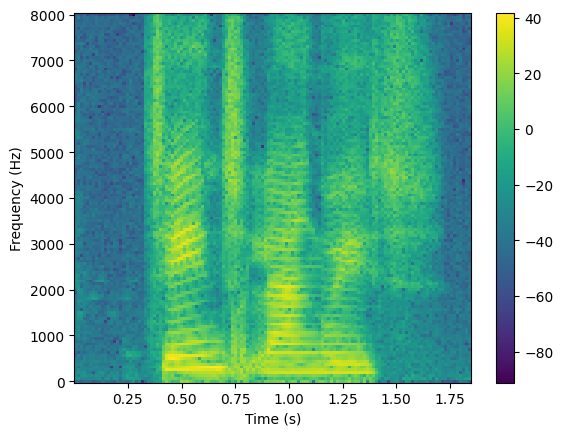

<function scipy.signal._spectral_py.spectrogram(x, fs=1.0, window=('tukey', 0.25), nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, mode='psd')>

In [95]:
test_path = df['path'].loc[0]
plot_spectrogram(test_path)

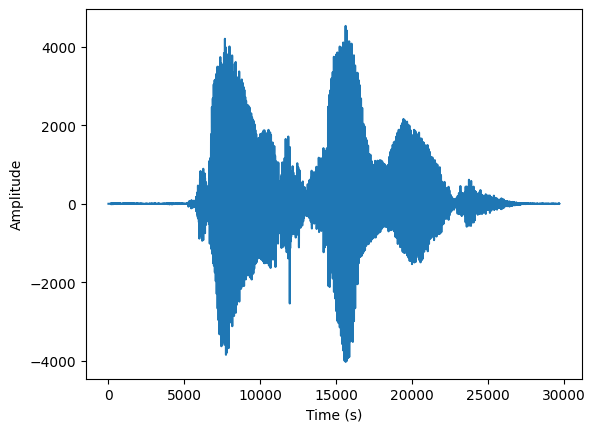

In [50]:
plot_time_dimension(test_path)

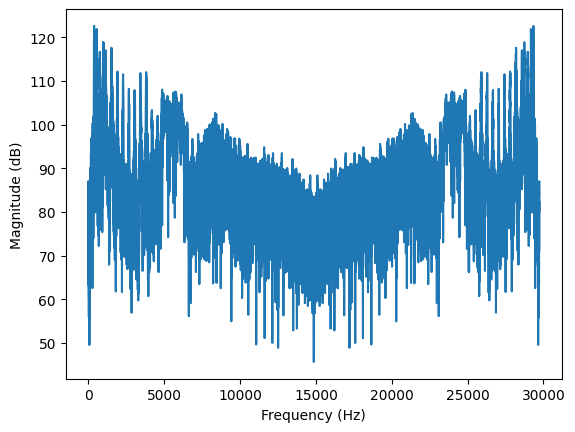

In [53]:
plot_freq_dimension(test_path)
